# Common Risk Factors in Cryptocurrency

**link to coinmarketcap dataset on kaggle** : https://www.kaggle.com/datasets/bizzyvinci/coinmarketcap-historical-data?select=historical.csv


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import numpy as np

In [2]:
# Load historical data

historical = pd.read_csv('./input/historical.csv')
historical.head(2)

,date,coin_id,cmc_rank,market_cap,price,open,high,low,close,time_high,time_low,volume_24h,percent_change_1h,percent_change_24h,percent_change_7d,circulating_supply,total_supply,max_supply,num_market_pairs
0,2013-04-28,1,1,1.488567e+09,134.210022,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.639231,NaN,NaN,11091325.0,11091325.0,21000000.0,NaN
1,2013-04-28,2,2,7.463702e+07,4.348405,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.799273,NaN,NaN,17164230.0,17164230.0,84000000.0,NaN


In [3]:
# Extract necessary col from historical db

historical = historical[['date', 'coin_id', 'market_cap', 'close', 'volume_24h']]

In [4]:
# Load coins data

coins = pd.read_csv('./input/coins.csv')
coins.head(2)

,id,name,slug,symbol,status,category,description,subreddit,notice,tags,...,message_board,chat,explorer,reddit,technical_doc,source_code,announcement,platform_id,date_added,date_launched
0,1,Bitcoin,bitcoin,BTC,active,coin,## **What Is Bitcoin (BTC)?**\n\nBitcoin is a ...,bitcoin,NaN,"mineable, pow, sha-256, store-of-value, state-...",...,https://bitcointalk.org,NaN,https://blockchain.coinmarketcap.com/chain/bit...,https://reddit.com/r/bitcoin,https://bitcoin.org/bitcoin.pdf,https://github.com/bitcoin/,NaN,NaN,2013-04-28T00:00:00.000Z,NaN
1,2,Litecoin,litecoin,LTC,active,coin,## What Is Litecoin (LTC)?\n\nLitecoin (LTC) i...,litecoin,NaN,"mineable, pow, scrypt, medium-of-exchange, bin...",...,"https://litecointalk.io/, https://litecoin-fou...",https://telegram.me/litecoin,"https://blockchair.com/litecoin, https://chain...",https://reddit.com/r/litecoin,NaN,https://github.com/litecoin-project/litecoin,https://bitcointalk.org/index.php?topic=47417.0,NaN,2013-04-28T00:00:00.000Z,NaN


In [5]:
# Extract necessary cols from coins db

coins = coins.rename(columns={'id': 'coin_id'})
coins = coins[['coin_id', 'symbol', 'status', 'category']]

In [6]:
# Merge two datasets : historical and coins
# There're no diff between inner, right and left joins

db = historical.merge(coins, on='coin_id', how='inner')


In [7]:
db.head()

,date,coin_id,market_cap,close,volume_24h,symbol,status,category
0,2013-04-28,1,1.488567e+09,NaN,0.0,BTC,active,coin
1,2013-04-29,1,1.603769e+09,144.539993,0.0,BTC,active,coin
2,2013-04-30,1,1.542813e+09,139.000000,0.0,BTC,active,coin
3,2013-05-01,1,1.298955e+09,116.989998,0.0,BTC,active,coin
4,2013-05-02,1,1.168517e+09,105.209999,0.0,BTC,active,coin


In [8]:
db.describe()


,coin_id,market_cap,close,volume_24h
count,4.441972e+06,3.900714e+06,4.399423e+06,4.441972e+06
mean,3.056184e+03,3.756089e+10,2.258934e+05,6.657222e+08
std,2.359836e+03,2.815395e+13,5.491723e+07,9.462810e+11
min,1.000000e+00,-1.414391e+09,0.000000e+00,0.000000e+00
25%,1.291000e+03,1.152741e+04,1.015235e-03,3.288402e+01
50%,2.549000e+03,3.041673e+05,1.141340e-02,3.487587e+03
75%,3.995000e+03,3.931232e+06,1.567196e-01,1.309907e+05
max,1.112300e+04,2.506329e+16,1.513989e+10,1.410296e+15


In [9]:
# Datatypes of each column
print(db.dtypes)

date           object
coin_id         int64
market_cap    float64
close         float64
volume_24h    float64
symbol         object
status         object
category       object
dtype: object


In [10]:
# Initial number of unique coins
len(db['coin_id'].unique())


8927

In [11]:
# Check num of na vals for each col
db.isna().sum()

date               0
coin_id            0
market_cap    541258
close          42549
volume_24h         0
symbol             0
status             0
category       15353
dtype: int64

In [12]:
# Convert 'date' to datetime format
db['date'] = pd.to_datetime(db['date'])


In [13]:
# Extract the year and create a new 'year' column
db['year'] = db['date'].dt.year

In [14]:
# Create day of year column to calculate day of week later

db['dy'] = db['date'].dt.dayofyear

# Check that day were assigned right
# db[db['year'] == 2016]['dy'].unique()


In [15]:
db = db.sort_values(by='date')
db.head()

,date,coin_id,market_cap,close,volume_24h,symbol,status,category,year,dy
0,2013-04-28,1,1.488567e+09,NaN,0.0,BTC,active,coin,2013,118
9059,2013-04-28,3,5.995997e+06,NaN,0.0,NMC,active,coin,2013,118
12079,2013-04-28,4,1.503099e+06,NaN,0.0,TRC,active,coin,2013,118
3020,2013-04-28,2,7.463702e+07,NaN,0.0,LTC,active,coin,2013,118
15084,2013-04-28,7,1.424087e+06,NaN,0.0,DVC,inactive,coin,2013,118


## Data construction

- Our sample includes **1827 coins** from the beginning of 2014 to July 2020.
- We require that coins have info on price, volume and market capitalization.
- We further exclude coins with market cap of less than $1000000.

In [16]:
db = db[(db['date'] >= '2014-01-01') & (db['date'] <= '2020-07-31')]

db = db.dropna(subset=['market_cap', 'close', 'volume_24h'])

db = db[db['market_cap'] > 1000000]


In [22]:
# data cleaning
# check num of na vals and the min val for market cap
print(f"Minimum market cap : {min(db['market_cap'])}\n\n")
print(f"Sum of na vals :\n{db.isna().sum()}")


Minimum market cap : 1000004.67590191


Sum of na vals :
date          0
coin_id       0
market_cap    0
close         0
volume_24h    0
symbol        0
status        0
category      0
year          0
dy            0
dtype: int64


In [23]:
# Creating week column

def define_week(day):
    if day % 7 == 0:
        return day // 7
    elif day in [365, 366]:
        return day // 7
    else:
        return day // 7 + 1

db['week'] = db['dy'].apply(define_week)


In [24]:
# Check that num of week was assigned right

db[db['date'] == '2017-01-01']['week']


4364       1
385203     1
1133666    1
253265     1
982116     1
          ..
539728     1
1054375    1
7383       1
482099     1
124097     1
Name: week, Length: 80, dtype: int64

In [25]:
# Check number of unique coins

len(db['coin_id'].unique())

2417

In [26]:
# Check all possible categories

db['category'].unique()


array(['coin', 'token'], dtype=object)

In [27]:
# Check for 0 vals in volume
db = db.sort_values(by = 'volume_24h')
db.head()

,date,coin_id,market_cap,close,volume_24h,symbol,status,category,year,dy,week
2515558,2019-07-04,2902,9.753857e+06,0.011041,0.0,PCH,active,token,2019,185,27
2556932,2019-12-17,2952,2.117130e+06,0.019979,0.0,GBC,untracked,token,2019,351,51
2454847,2019-12-17,2833,1.783555e+06,0.002782,0.0,IVY,untracked,token,2019,351,51
2053960,2019-12-17,2340,1.444031e+06,0.026919,0.0,BLT,untracked,token,2019,351,51
3298539,2019-12-17,3855,5.806000e+06,0.007256,0.0,LOCUS,untracked,token,2019,351,51


In [29]:
# Remove all rows where volume is 0
db = db[db['volume_24h'] != 0]
db.head()

,date,coin_id,market_cap,close,volume_24h,symbol,status,category,year,dy,week
2890778,2019-12-11,3367,1.009860e+06,0.001010,2.019719e-11,CRD,active,token,2019,345,50
2890777,2019-12-10,3367,1.019143e+06,0.001019,2.038286e-11,CRD,active,token,2019,344,50
2890755,2019-11-18,3367,2.241976e+06,0.002242,2.241976e-11,CRD,active,token,2019,322,46
2890854,2020-02-25,3367,1.026711e+06,0.001027,7.186977e-11,CRD,active,token,2020,56,8
2890853,2020-02-24,3367,1.061825e+06,0.001062,7.432776e-11,CRD,active,token,2020,55,8


In [30]:
# Make a db without untracked coins
# If remove untracked coins then the number of unique coins decreases significantly
# But it may distort the summary statistics so should check different scenarios

no_untracked = db[db['status'] != 'untracked']

len(no_untracked['coin_id'].unique())

1986

In [31]:
# Check the final dataset
round(no_untracked.describe())

,date,coin_id,market_cap,close,volume_24h,year,dy,week
count,840750,840750.0,8.407500e+05,840750.0,8.407500e+05,840750.0,840750.0,840750.0
mean,2018-12-14 20:18:09.415878144,2086.0,1.737683e+11,65.0,6.281604e+07,2018.0,177.0,26.0
min,2014-01-01 00:00:00,1.0,1.000005e+06,0.0,0.000000e+00,2014.0,1.0,1.0
25%,2018-04-17 00:00:00,1376.0,2.621088e+06,0.0,1.704000e+04,2018.0,92.0,14.0
50%,2019-02-06 00:00:00,2130.0,7.190734e+06,0.0,1.572590e+05,2019.0,174.0,25.0
75%,2019-11-12 00:00:00,2737.0,2.560492e+07,0.0,1.241264e+06,2019.0,262.0,38.0
max,2020-07-31 00:00:00,5864.0,2.506329e+16,1569870.0,9.931533e+10,2020.0,366.0,52.0
std,NaN,1163.0,6.064246e+13,4828.0,1.115904e+09,1.0,102.0,15.0


## Prepare data for summary statistics table


In [32]:
# Explore the outliers in market cap

no_untracked = no_untracked.sort_values(by = 'market_cap')
no_untracked.tail(8)


,date,coin_id,market_cap,close,volume_24h,symbol,status,category,year,dy,week
1693,2017-12-16,1,3.265018e+11,19497.400391,1.274062e+10,BTC,active,coin,2017,350,50
3184027,2020-06-27,3787,1.604689e+16,0.000262,3.487840e+02,INNBCL,active,token,2020,179,26
3184026,2020-06-26,3787,1.870215e+16,0.000305,3.007087e+02,INNBCL,active,token,2020,178,26
3184029,2020-06-29,3787,1.906801e+16,0.000311,1.285035e+03,INNBCL,active,token,2020,181,26
3184024,2020-06-24,3787,2.194456e+16,0.000358,3.779414e+02,INNBCL,active,token,2020,176,26
3184030,2020-06-30,3787,2.221566e+16,0.000362,2.473110e+02,INNBCL,active,token,2020,182,26
3184025,2020-06-25,3787,2.275425e+16,0.000371,4.928877e+01,INNBCL,active,token,2020,177,26
3184028,2020-06-28,3787,2.506329e+16,0.000409,2.825397e+02,INNBCL,active,token,2020,180,26


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb5a362fbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb5a35ce190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb5a362fa90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb5a35ce6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb5a35ce970>],
 'means': []}

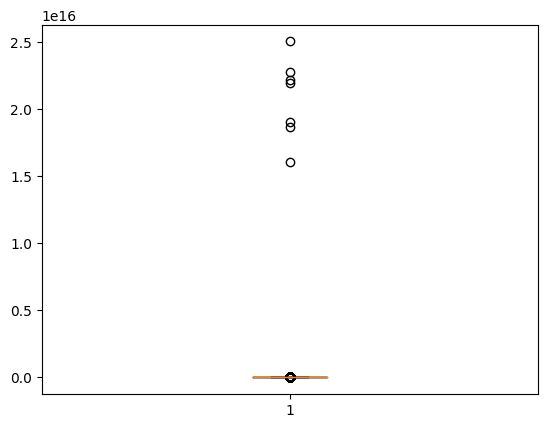

In [33]:
# Check how many outliers there is (answer - 7)
plt.boxplot(no_untracked['market_cap'])

In [34]:
# Make a new db without the outliers for market cap

no_outlier_mc = no_untracked.iloc[:-7, :]
no_outlier_mc.tail()

# try to winsorize market cap data using winsorize function ---> useless

# w_mc_db = no_untracked.copy()
# w_mc_db['market_cap'] = winsorize(no_untracked['market_cap'], limits=[0.05, 0.05])
# w_mc_db.tail()

# Winsorizing or removing outliers from volume is also useless : too many outliers


,date,coin_id,market_cap,close,volume_24h,symbol,status,category,year,dy,week
1696,2017-12-19,1,2.978004e+11,17776.699219,1.689448e+10,BTC,active,coin,2017,353,51
1684,2017-12-07,1,2.994045e+11,17899.699219,1.795070e+10,BTC,active,coin,2017,341,49
1695,2017-12-18,1,3.201747e+11,19114.199219,1.483953e+10,BTC,active,coin,2017,352,51
1694,2017-12-17,1,3.205758e+11,19140.800781,1.331456e+10,BTC,active,coin,2017,351,51
1693,2017-12-16,1,3.265018e+11,19497.400391,1.274062e+10,BTC,active,coin,2017,350,50


### Summary statistics panel A

In [35]:
# Construct panel A of summary statistics table
summary = no_outlier_mc.groupby('year').agg(
    num_observations=('coin_id', 'nunique'),
    mean_market_cap=('market_cap', 'mean'),
    median_market_cap=('market_cap', 'median'),
    mean_volume_24h=('volume_24h', 'mean'),
    median_volume_24h=('volume_24h', 'median'),
)

summary['mean_market_cap'] = round(summary['mean_market_cap'] / 1000000, 2)
summary['median_market_cap'] = round(summary['median_market_cap'] / 1000000, 2)  
summary['mean_volume_24h'] = round(summary['mean_volume_24h'] / 1000, 2)  
summary['median_volume_24h'] = round(summary['median_volume_24h'] / 1000, 2)

summary.loc['Full', 'num_observations'] = no_outlier_mc['coin_id'].nunique()
summary.loc['Full', 'mean_market_cap'] = round(no_outlier_mc['market_cap'].mean() / 1000000, 2)
summary.loc['Full', 'median_market_cap'] = round(no_outlier_mc['market_cap'].median() / 1000000, 2)
summary.loc['Full', 'mean_volume_24h'] = round(no_outlier_mc['volume_24h'].mean() / 1000, 2)
summary.loc['Full', 'median_volume_24h'] = round(no_outlier_mc['volume_24h'].median() / 1000, 2)


In [36]:
summary


,num_observations,mean_market_cap,median_market_cap,mean_volume_24h,median_volume_24h
year,,,,,
2014,141.0,238.86,3.81,1143.23,31.04
2015,79.0,136.55,2.78,1195.38,9.63
2016,167.0,172.57,3.54,1956.52,20.85
2017,707.0,490.72,10.00,21686.09,132.17
2018,1293.0,433.04,10.66,25309.67,155.85
2019,1202.0,287.99,5.91,73670.79,175.82
2020,1149.0,330.88,5.96,139938.75,282.05
Full,1986.0,357.87,7.19,62816.57,157.27


In [37]:
db = no_outlier_mc.copy()

### Calculating daily and weekly coin returns

$$R_t=(P_t-P_{t-1})/P_{t-1}$$

In [38]:
db = db.sort_values(by = ['coin_id', 'date'])


In [39]:
# Calculate daily returns

db['close_t0'] = db.groupby(['coin_id'])['close'].shift(1)
db['daily_ret'] = (db['close'] - db['close_t0']) / db['close_t0']


In [41]:
# replace NA values with 0
db['daily_ret'].fillna(0, inplace = True)
print(f"Check num of na vals for daily ret: {db['daily_ret'].isna().sum()}")

Check num of na vals for daily ret: 0


In [42]:
# Creating a db with weekly returns

db_weekly_ret = db.groupby(['coin_id', 'year', 'week'])['daily_ret'].sum().reset_index(name = 'weekly_ret')

In [43]:
# merge weekly ret dataset to the main

db = db.merge(db_weekly_ret, on = ['coin_id', 'year', 'week'], how = 'left')


## FINAL DATA


In [44]:
# importing a csv file with treasury bill rates and changing date to datetime format

db_treasury_bill = pd.read_csv("./input/daily_treasury_bill_rates_2011-2020.csv")
db_treasury_bill['date'] = pd.to_datetime(db_treasury_bill['date'])


/tmp/ipykernel_67841/3684434476.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  db_treasury_bill['date'] = pd.to_datetime(db_treasury_bill['date'])


In [45]:
# merging treasury bill db to main

db = db.merge(db_treasury_bill, on = ['date'], how = 'left')


In [46]:
# replace missing treasuries with 0
db['one_mth_treasury'].fillna(0, inplace = True)
print(f"Check num of na vals for treasuries: {db['one_mth_treasury'].isna().sum()}")

Check num of na vals for treasuries: 0


In [47]:
db.to_csv('./inter/processed_data.csv', index = False)

In [48]:
db.head()

,date,coin_id,market_cap,close,volume_24h,symbol,status,category,year,dy,week,close_t0,daily_ret,weekly_ret,one_mth_treasury
0,2014-01-01,1,9.403308e+09,771.400024,22489442.0,BTC,active,coin,2014,1,1,NaN,0.000000,0.05893,0.00
1,2014-01-02,1,9.781074e+09,802.390015,38489484.0,BTC,active,coin,2014,2,1,771.400024,0.040174,0.05893,0.01
2,2014-01-03,1,9.980135e+09,818.719971,37810068.0,BTC,active,coin,2014,3,1,802.390015,0.020352,0.05893,0.01
3,2014-01-04,1,1.047736e+10,859.510010,38004980.0,BTC,active,coin,2014,4,1,818.719971,0.049822,0.05893,0.00
4,2014-01-05,1,1.137966e+10,933.530029,72898520.0,BTC,active,coin,2014,5,1,859.510010,0.086119,0.05893,0.00


### Summary statistics pane B

**Value-weighted weekly market returns calculation**

1. Calculate the market value for each coin on each day.
2. Calculate the total market value for all coins on each day.
3. Calculate the weight of each coin on each day as its market value divided by the total market value.
4. Multiply the daily returns of each coin by its weight and sum these values to get the value-weighted return for each day.



In [49]:
# Import final data
db = pd.read_csv('./inter/processed_data.csv')
db['date'] = pd.to_datetime(db['date'])


In [50]:
# Calculate value-weighted weekly returns

db_mkt = db.copy()

db_mkt = db_mkt.sort_values(by=['coin_id', 'date'])

db_mkt['market_value'] = db_mkt['market_cap'] * db_mkt['close']

db_mkt['ttl_market_value'] = db_mkt.groupby('date')['market_value'].transform('sum')

db_mkt['weight'] = db_mkt['market_value'] / db_mkt['ttl_market_value']

db_mkt['daily_weight_return'] = db_mkt['daily_ret'] * db_mkt['weight']

mkt_weight_return = db_mkt.groupby(['year', 'week'])['daily_weight_return'].sum().reset_index(name = 'mkt_weekly_weight_ret')



In [51]:
# Initialize a dataframe for pane B results

paneB_sum = pd.DataFrame({
    ' ' : [],
    'Mean' : [],
    'Median' : [],
    'SD' : [],
    'Skewness' : [],
    'Kurtosis' : []
})


In [52]:
# Summary for Coin market return

paneB_sum.loc[0, ' '] = 'Coin Market Return'
paneB_sum.loc[0, 'Mean'] = round(mkt_weight_return['mkt_weekly_weight_ret'].mean(), 3)
paneB_sum.loc[0, 'Median'] = round(mkt_weight_return['mkt_weekly_weight_ret'].median(), 3)
paneB_sum.loc[0, 'SD'] = round(mkt_weight_return['mkt_weekly_weight_ret'].std(), 3)
paneB_sum.loc[0, 'Skewness'] = round(mkt_weight_return['mkt_weekly_weight_ret'].skew(), 3)
paneB_sum.loc[0, 'Kurtosis'] = round(mkt_weight_return['mkt_weekly_weight_ret'].kurt(), 3)
paneB_sum.head()

,,Mean,Median,SD,Skewness,Kurtosis
0,Coin Market Return,0.014,0.006,0.109,0.08,2.019


In [53]:
def define_week(day):
    if day % 7 == 0:
        return day // 7
    elif day in [365, 366]:
        return day // 7
    else:
        return day // 7 + 1

In [56]:
# XRP weekly returns

db_XRP = db[db['symbol'] == 'XRP']
print(db_XRP['symbol'].unique())

daily_XRP = db_XRP.groupby(['date'])['close'].sum().reset_index(name = "daily_close")

daily_XRP['year'] = daily_XRP['date'].dt.year

daily_XRP['dy'] = daily_XRP['date'].dt.dayofyear

daily_XRP['week'] = daily_XRP['dy'].apply(define_week)

print(daily_XRP.head())


# Calculate daily XRP returns

daily_XRP = daily_XRP.sort_values(by=['date'])

daily_XRP = daily_XRP.rename(columns={'daily_close' : 'close_t1'})

daily_XRP['close_t0'] = daily_XRP['close_t1'].shift(1)

daily_XRP['daily_log_ret'] = np.log(daily_XRP['close_t1']) - np.log(daily_XRP['close_t0'])

print(daily_XRP.head())


# Create weekly market returns

daily_XRP = daily_XRP.sort_values(by=['year', 'week'])

weekly_XRP = daily_XRP.groupby(['year', 'week'])['daily_log_ret'].sum().reset_index(name = "weekly_XRP_logret")

weekly_XRP['weekly_XRP_ret'] = np.exp(weekly_XRP['weekly_XRP_logret']) - 1 

weekly_XRP.head()

# Create a summarr for XRP

paneB_sum.loc[2, ' '] = 'XRP'
paneB_sum.loc[2, 'Mean'] = round(weekly_XRP['weekly_XRP_ret'].mean(), 3)
paneB_sum.loc[2, 'Median'] = round(weekly_XRP['weekly_XRP_ret'].median(), 3)
paneB_sum.loc[2, 'SD'] = round(weekly_XRP['weekly_XRP_ret'].std(), 3)
paneB_sum.loc[2, 'Skewness'] = round(weekly_XRP['weekly_XRP_ret'].skew(), 3)
paneB_sum.loc[2, 'Kurtosis'] = round(weekly_XRP['weekly_XRP_ret'].kurt(), 3)
paneB_sum.head()


['XRP']
        date  daily_close  year  dy  week
0 2014-01-01     0.026944  2014   1     1
1 2014-01-02     0.028726  2014   2     1
2 2014-01-03     0.027627  2014   3     1
3 2014-01-04     0.028129  2014   4     1
4 2014-01-05     0.025230  2014   5     1
        date  close_t1  year  dy  week  close_t0  daily_log_ret
0 2014-01-01  0.026944  2014   1     1       NaN            NaN
1 2014-01-02  0.028726  2014   2     1  0.026944       0.064010
2 2014-01-03  0.027627  2014   3     1  0.028726      -0.038981
3 2014-01-04  0.028129  2014   4     1  0.027627       0.018004
4 2014-01-05  0.025230  2014   5     1  0.028129      -0.108798


,,Mean,Median,SD,Skewness,Kurtosis
0,Coin Market Return,0.014,0.006,0.109,0.080,2.019
2,XRP,0.026,-0.003,0.236,3.904,24.236


In [57]:
# ETH weekly returns

db_ETH = db[db['symbol'] == 'ETH']
print(db_ETH['symbol'].unique())

daily_ETH = db_ETH.groupby(['date'])['close'].sum().reset_index(name = "daily_close")
daily_ETH['year'] = daily_ETH['date'].dt.year
daily_ETH['dy'] = daily_ETH['date'].dt.dayofyear

daily_ETH['week'] = daily_ETH['dy'].apply(define_week)
print(daily_ETH.head())

# Calculate daily ETH returns

daily_ETH = daily_ETH.sort_values(by=['date'])
daily_ETH = daily_ETH.rename(columns={'daily_close' : 'close_t1'})
daily_ETH['close_t0'] = daily_ETH['close_t1'].shift(1)
daily_ETH['daily_log_ret'] = np.log(daily_ETH['close_t1']) - np.log(daily_ETH['close_t0'])
print(daily_ETH.head())

# Create weekly ETH returns

daily_ETH = daily_ETH.sort_values(by=['year', 'week'])
weekly_ETH = daily_ETH.groupby(['year', 'week'])['daily_log_ret'].sum().reset_index(name = "weekly_ETH_logret")
weekly_ETH['weekly_ETH_ret'] = np.exp(weekly_ETH['weekly_ETH_logret']) - 1 
weekly_ETH.head()

# Summary for ETH

paneB_sum.loc[3, ' '] = 'ETH'
paneB_sum.loc[3, 'Mean'] = round(weekly_ETH['weekly_ETH_ret'].mean(), 3)
paneB_sum.loc[3, 'Median'] = round(weekly_ETH['weekly_ETH_ret'].median(), 3)
paneB_sum.loc[3, 'SD'] = round(weekly_ETH['weekly_ETH_ret'].std(), 3)
paneB_sum.loc[3, 'Skewness'] = round(weekly_ETH['weekly_ETH_ret'].skew(), 3)
paneB_sum.loc[3, 'Kurtosis'] = round(weekly_ETH['weekly_ETH_ret'].kurt(), 3)
paneB_sum.head()




['ETH']
        date  daily_close  year   dy  week
0 2015-08-08     0.753325  2015  220    32
1 2015-08-09     0.701897  2015  221    32
2 2015-08-10     0.708448  2015  222    32
3 2015-08-11     1.067860  2015  223    32
4 2015-08-12     1.217440  2015  224    32
        date  close_t1  year   dy  week  close_t0  daily_log_ret
0 2015-08-08  0.753325  2015  220    32       NaN            NaN
1 2015-08-09  0.701897  2015  221    32  0.753325      -0.070710
2 2015-08-10  0.708448  2015  222    32  0.701897       0.009290
3 2015-08-11  1.067860  2015  223    32  0.708448       0.410335
4 2015-08-12  1.217440  2015  224    32  1.067860       0.131094


,,Mean,Median,SD,Skewness,Kurtosis
0,Coin Market Return,0.014,0.006,0.109,0.080,2.019
2,XRP,0.026,-0.003,0.236,3.904,24.236
3,ETH,0.042,0.013,0.209,2.085,9.199


In [58]:
# BTC weekly returns

db_BTC = db[db['symbol'] == 'BTC']
print(db_BTC['symbol'].unique())

daily_BTC = db_BTC.groupby(['date'])['close'].sum().reset_index(name = "daily_close")
daily_BTC['year'] = daily_BTC['date'].dt.year
daily_BTC['dy'] = daily_BTC['date'].dt.dayofyear

daily_BTC['week'] = daily_BTC['dy'].apply(define_week)
print(daily_BTC.head())

# Calculate daily BTC returns

daily_BTC = daily_BTC.sort_values(by=['date'])
daily_BTC = daily_BTC.rename(columns={'daily_close' : 'close_t1'})
daily_BTC['close_t0'] = daily_BTC['close_t1'].shift(1)
daily_BTC['daily_log_ret'] = np.log(daily_BTC['close_t1']) - np.log(daily_BTC['close_t0'])
print(daily_BTC.head())

# Create weekly market returns

daily_BTC = daily_BTC.sort_values(by=['year', 'week'])
weekly_BTC = daily_BTC.groupby(['year', 'week'])['daily_log_ret'].sum().reset_index(name = "weekly_BTC_logret")
weekly_BTC['weekly_BTC_ret'] = np.exp(weekly_BTC['weekly_BTC_logret']) - 1 
weekly_BTC.head()

# Summary for BTC

paneB_sum.loc[1, ' '] = 'BTC'
paneB_sum.loc[1, 'Mean'] = round(weekly_BTC['weekly_BTC_ret'].mean(), 3)
paneB_sum.loc[1, 'Median'] = round(weekly_BTC['weekly_BTC_ret'].median(), 3)
paneB_sum.loc[1, 'SD'] = round(weekly_BTC['weekly_BTC_ret'].std(), 3)
paneB_sum.loc[1, 'Skewness'] = round(weekly_BTC['weekly_BTC_ret'].skew(), 3)
paneB_sum.loc[1, 'Kurtosis'] = round(weekly_BTC['weekly_BTC_ret'].kurt(), 3)

paneB_sum = paneB_sum.sort_index()
paneB_sum.head()



['BTC']
        date  daily_close  year  dy  week
0 2014-01-01   771.400024  2014   1     1
1 2014-01-02   802.390015  2014   2     1
2 2014-01-03   818.719971  2014   3     1
3 2014-01-04   859.510010  2014   4     1
4 2014-01-05   933.530029  2014   5     1
        date    close_t1  year  dy  week    close_t0  daily_log_ret
0 2014-01-01  771.400024  2014   1     1         NaN            NaN
1 2014-01-02  802.390015  2014   2     1  771.400024       0.039388
2 2014-01-03  818.719971  2014   3     1  802.390015       0.020147
3 2014-01-04  859.510010  2014   4     1  818.719971       0.048620
4 2014-01-05  933.530029  2014   5     1  859.510010       0.082611


,,Mean,Median,SD,Skewness,Kurtosis
0,Coin Market Return,0.014,0.006,0.109,0.080,2.019
1,BTC,0.014,0.004,0.111,0.385,1.782
2,XRP,0.026,-0.003,0.236,3.904,24.236
3,ETH,0.042,0.013,0.209,2.085,9.199
